In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 14 kB/s 
     |████████████████████████████████| 511.8 MB 9.3 kB/s 


In [3]:
import tensorflow as tf
import os

In [4]:
import cv2
import imghdr

In [1]:
!unzip "./archive.zip" -d "./"

Archive:  ./archive.zip
  inflating: ./caltech101_classification/Motorbikes/image_0001.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0002.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0003.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0004.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0005.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0006.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0007.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0008.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0009.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0010.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0011.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0012.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0013.jpg  
  inflating: ./caltech101_classification/Motorbikes/image_0014.jpg  
  inflatin

In [5]:
data_dir = "./caltech101_classification" 

In [9]:
pwd

'/content'

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1661 files belonging to 3 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

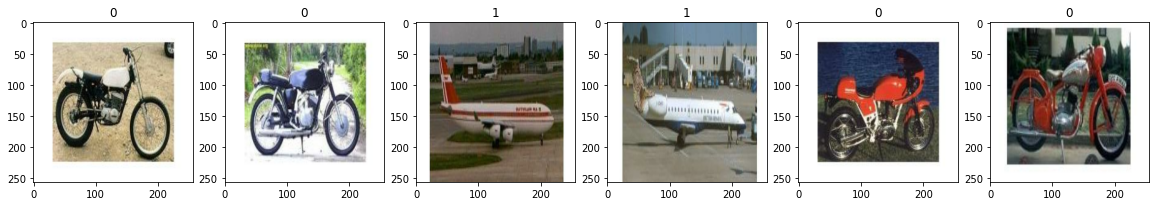

In [20]:
fig, ax = plt.subplots(ncols=6 ,figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [21]:
#reference-example-https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb
data = data.map(lambda x,y: (x/255, y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# Data Spliting

In [23]:
#splitting train,test,dev to 60%,20%,20%
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Model Training

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [134]:
model=Sequential()

In [135]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [136]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [137]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_113 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_114 (Conv2D)         (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 30, 30, 16)     

# Training the Model

In [33]:
logdir='logs'

In [93]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [138]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')
model_name = './best_model.h5'
model_callback = ModelCheckpoint(filepath=model_name, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [140]:
hist = model.fit(train, epochs=5,verbose=1, validation_data=val, callbacks=[model_callback])

Epoch 1/5
31/31 [==============================] - ETA: 0s - loss: 0.2160 - accuracy: 0.8498
Epoch 1: val_accuracy improved from -inf to 0.84688, saving model to ./best_model.h5
31/31 [==============================] - 59s 2s/step - loss: 0.2160 - accuracy: 0.8498 - val_loss: -0.2062 - val_accuracy: 0.8469
Epoch 2/5
31/31 [==============================] - ETA: 0s - loss: -0.6307 - accuracy: 0.9173
Epoch 2: val_accuracy improved from 0.84688 to 0.85938, saving model to ./best_model.h5
31/31 [==============================] - 58s 2s/step - loss: -0.6307 - accuracy: 0.9173 - val_loss: -2.5429 - val_accuracy: 0.8594
Epoch 3/5
31/31 [==============================] - ETA: 0s - loss: -3.5272 - accuracy: 0.9042
Epoch 3: val_accuracy improved from 0.85938 to 0.91250, saving model to ./best_model.h5
31/31 [==============================] - 57s 2s/step - loss: -3.5272 - accuracy: 0.9042 - val_loss: -9.7189 - val_accuracy: 0.9125
Epoch 4/5
31/31 [==============================] - ETA: 0s - loss:

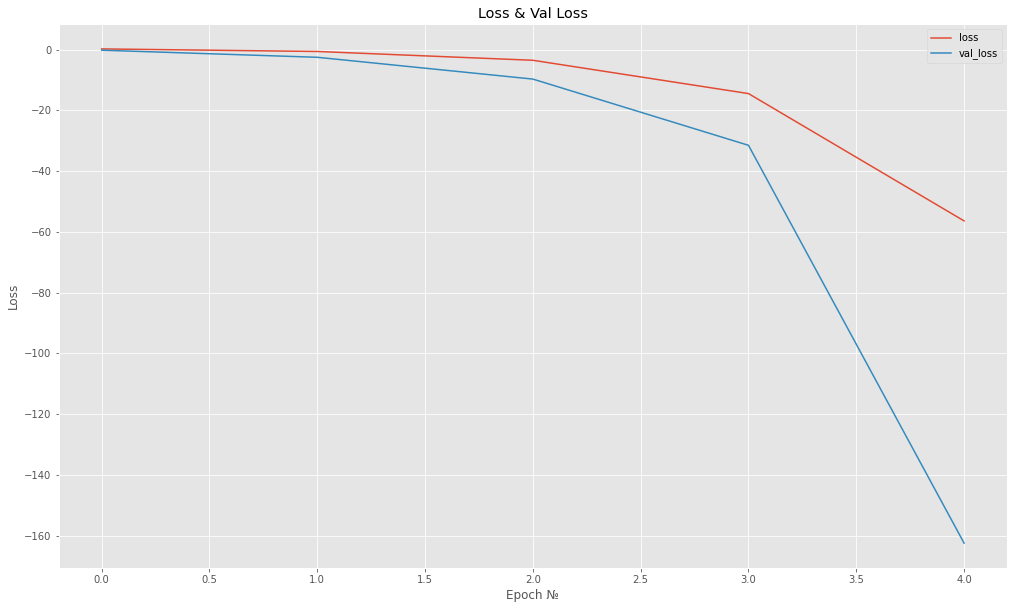

In [141]:
lossNames = ["loss"]

N = np.arange(0, 5)
plt.style.use("ggplot")
plt.figure(figsize=(17, 10))


# plot the loss for both the training and validation data
plt.title("Loss & Val Loss")
plt.xlabel("Epoch №")
plt.ylabel("Loss")
plt.plot(N, hist.history["loss"], label="loss")
plt.plot(N, hist.history["val_loss"], label="val_loss")
plt.legend()

plt.show()

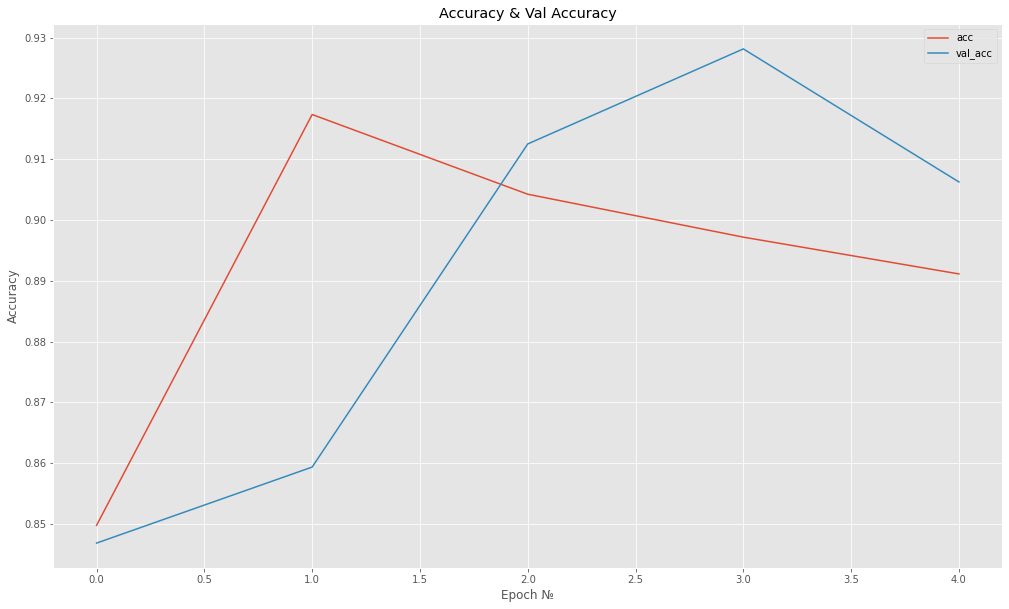

In [142]:
plt.style.use("ggplot")
plt.figure(figsize=(17, 10))

plt.plot(N, hist.history["accuracy"], label="acc")
plt.plot(N, hist.history["val_accuracy"], label="val_acc")

plt.title("Accuracy & Val Accuracy")
plt.xlabel("Epoch №")
plt.ylabel("Accuracy")
plt.legend()